In [155]:
#importing a lot of unnecessary stuff, I know..
from __future__ import division, print_function, unicode_literals
import os
import ccdproc
import glob
import subprocess
import itertools
import numpy as np
from astropy import units as u
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import utils as wcsutils
from astropy.table import Table
from astropy.stats import sigma_clip
from astroquery.simbad import Simbad
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc, rcParams

In [156]:
%matplotlib inline

In [157]:
# Absolute path of the top level directory containing raw data
#plan to alter code to actually use this.
raw_root = "/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw"

In [158]:
# TO DO: make a loop or function that can automate this process for a given CCD name input. 
# Any more than a couple of CCD's and the below gets tedious.

# 83F010771

### Mean combine biases:

In [165]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_12.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_13.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_14.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_15.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_bias_16.fits')

In [166]:
btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data
bias = (btot[:,:]/5.0)

In [167]:
bias.mean(), bias.min(), bias.max()

(772.45135, 710.20001, 1265.4)

### Median combine darks:

In [223]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010771/2015-12-11/83F010771_dark600_10.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data

In [227]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean()

(1238.0397,
 1208.6498,
 1213.0892,
 1228.1149,
 1212.9093,
 1212.3649,
 1208.6702,
 1216.5106,
 1206.8295,
 1199.6155)

In [220]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10])
dark_med = np.median(dark_stack, 0) 

In [221]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(1214.0712, 194.72324)

### Bias Temperatures

In [172]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT']

(-9.37, -9.37, -9.37, -9.37, -9.37)

### Dark Temperatures

In [180]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'],d11[0].header['TEMPERAT'],   

(-13.5, -10.6, -9.79, -9.37, -9.37, -9.79, -9.79, -9.79, -9.37, -9.37, -9.79)

### Write bias-subtracted master dark to file

In [179]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)

In [69]:
darkmedbiased.writeto('83F010771_dark_med_combine.fits')

### Visualization of dark

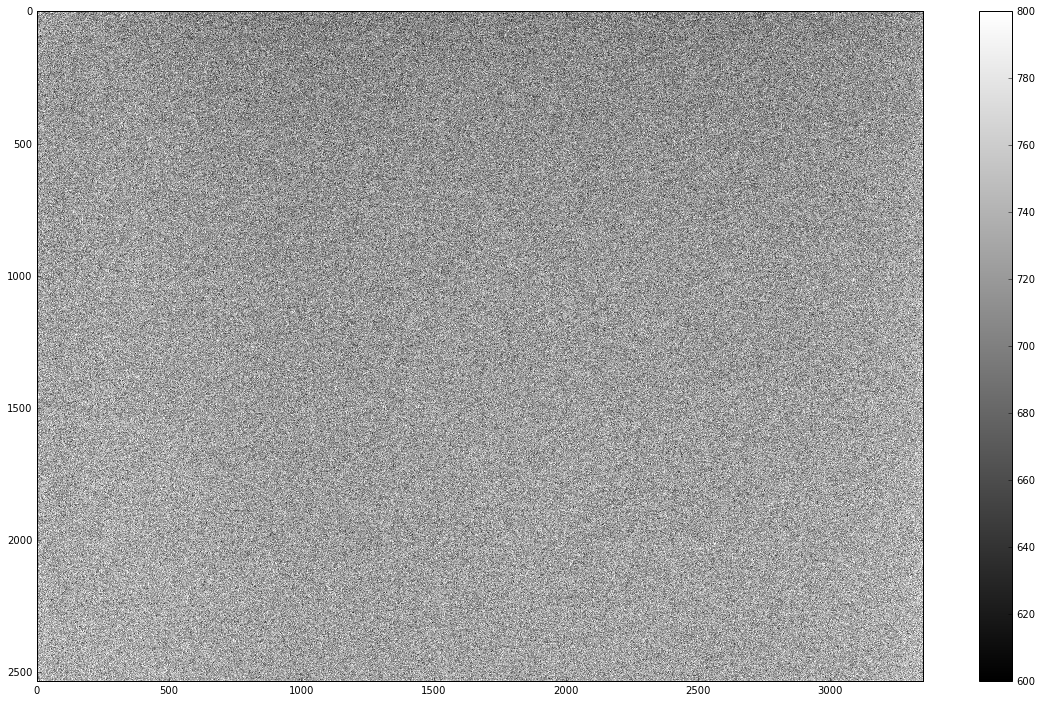

In [217]:
plt.imshow(dark1, cmap='gray', aspect='equal', interpolation='none')
plt.colorbar() 
plt.clim(600,800)
plt.gcf().set_size_inches(20,12)

# 83F010774

In [184]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_11.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_12.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_13.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_14.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_bias_15.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data
bias = (btot[:,:]/5.0)

In [182]:
bias.mean(), bias.min(), bias.max()

(1030.8654, 971.40002, 1591.0)

### Bias Temperatures

In [183]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT']

(-9.79, -9.79, -9.79, -9.79, -9.79)

In [132]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010774/2015-12-11/83F010774_dark600_10.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data

### Dark Temperatures

In [180]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'],d11[0].header['TEMPERAT'],   

(-13.5, -10.6, -9.79, -9.37, -9.37, -9.79, -9.79, -9.79, -9.37, -9.37, -9.79)

In [134]:
dark1.shape, bias.shape

((2532, 3352), (2532, 3352))

In [135]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [136]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(1131.948, 101.0825)

In [84]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010774_dark_med_biased.fits')

# 83F010801

In [188]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_01.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_02.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_03.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_04.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_05.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_06.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_07.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_bias_08.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data
bias = (btot[:,:]/8.0)

In [189]:
bias.mean(), bias.min(), bias.max()

(797.33124, 745.75, 2134.375)

In [190]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_15.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_10.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_11.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_12.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_13.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-11/83F010801_dark600_14.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data

### Individual bias means

In [191]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(804.42657,
 804.27222,
 804.00494,
 790.21991,
 792.01318,
 793.63757,
 794.48877,
 795.58295)

### Individual Dark means

In [192]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean()

(771.97089,
 765.71436,
 759.69666,
 759.45477,
 773.15259,
 774.20483,
 772.68134,
 770.8692,
 772.52197,
 772.94647,
 762.35767,
 758.11652,
 770.2359,
 771.63727)

In [193]:
dark1.shape, bias.shape

((2532, 3352), (2532, 3352))

In [194]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [195]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(768.26605, -29.064531)

### Bias Temperatures

In [199]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-8.54, -8.54, -8.54, -9.37, -9.37, -9.37, -9.37, -9.37)

### Dark Temperatures

In [197]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-8.96,
 -9.79,
 -10.2,
 -10.2,
 -8.96,
 -8.96,
 -8.96,
 -9.37,
 -8.96,
 -8.96,
 -10.2,
 -10.6,
 -9.37,
 -9.37)

In [102]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F010801 Round 2: -10C (2015-12-17)

In [231]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_16_bias.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_17_bias.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_18_bias.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_19_bias.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_20_bias.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_21_bias.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_22_bias.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_23_bias.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_22_bias.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_23_bias.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [232]:
bias.mean(), bias.min(), bias.max()

(765.68988, 708.09998, 2011.6)

In [233]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_1_dark.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_2_dark.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_3_dark.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_4_dark.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_5_dark.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_6_dark.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_7_dark.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_8_dark.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_9_dark.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_10_dark.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_11_dark.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_12_dark.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_13_dark.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_14_dark.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-10C/83F010801_15_dark.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

### Bias Temperatures

In [234]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-9.79, -10.2, -9.79, -10.2, -10.2, -9.79, -9.79, -9.79, -9.79, -9.79)

### Dark Temperatures

In [235]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-9.79,
 -9.79,
 -10.2,
 -9.79,
 -9.79,
 -9.79,
 -9.79,
 -9.79,
 -10.2,
 -9.79,
 -10.2,
 -9.79,
 -9.79,
 -10.2,
 -10.2)

### Individual Bias Means

In [237]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(760.98126,
 763.21173,
 764.30292,
 765.40918,
 765.73462,
 766.49719,
 767.10834,
 768.27399,
 767.10834,
 768.27399)

### Individual Dark Means

In [238]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean(), dark15.mean()

(729.80286,
 734.47571,
 736.95618,
 740.05963,
 739.57452,
 737.52722,
 734.81824,
 732.43341,
 728.47107,
 728.61731,
 731.07648,
 732.43445,
 728.77686,
 725.94135,
 724.70599)

In [239]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [240]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(732.2113, -33.478493)

In [102]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F010801 Round 3: -5C (2015-12-17)

In [241]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_41_bias.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_42_bias.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_43_bias.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_44_bias.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_45_bias.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_46_bias.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_47_bias.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_48_bias.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_49_bias.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_50_bias.fits')


btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [242]:
bias.mean(), bias.min(), bias.max()

(764.47723, 713.5, 2452.5)

In [243]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_26_dark.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_27_dark.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_28_dark.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_29_dark.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_30_dark.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_31_dark.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_32_dark.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_33_dark.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_34_dark.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_35_dark.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_36_dark.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_37_dark.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_38_dark.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_39_dark.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F010801/2015-12-17/-5C/83F010801_40_dark.fits')


dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

### Bias Temperatures

In [245]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT']

(-4.82, -4.82, -5.23, -4.82, -4.82, -5.23, -4.82, -5.23, -4.82, -5.23)

### Dark Temperatures

In [246]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d14[0].header['TEMPERAT']

(-5.23,
 -5.23,
 -5.23,
 -5.23,
 -4.82,
 -4.82,
 -5.23,
 -5.23,
 -4.82,
 -4.82,
 -4.82,
 -5.23,
 -5.23,
 -4.82,
 -4.82)

### Individual Bias Means

In [247]:
b1[0].data.mean(), b2[0].data.mean(), b3[0].data.mean(), b4[0].data.mean(), b5[0].data.mean(), b6[0].data.mean(), b7[0].data.mean(), b8[0].data.mean(), b7[0].data.mean(), b8[0].data.mean()

(760.69171,
 761.8454,
 762.97156,
 763.95245,
 765.07867,
 765.53864,
 765.75641,
 766.00146,
 765.75641,
 766.00146)

### Individual Dark Means

In [248]:
dark1.mean(), dark2.mean(), dark3.mean(), dark4.mean(), dark5.mean(), dark6.mean(), dark7.mean(), dark8.mean(), dark9.mean(), dark10.mean(), dark11.mean(), dark12.mean(), dark13.mean(), dark14.mean(), dark15.mean()

(699.1131,
 688.07788,
 695.46814,
 706.65271,
 714.49811,
 718.39386,
 721.02679,
 723.51617,
 723.49805,
 726.13123,
 726.71088,
 727.18298,
 727.237,
 727.98834,
 728.40344)

In [249]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [250]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(717.24188, -47.234875)

In [102]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F010801_dark_med_biased.fits')

# 83F011167

In [200]:
b1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_01.fits')
b2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_02.fits')
b3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_03.fits')
b4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_04.fits')
b5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_05.fits')
b6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_06.fits')
b7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_07.fits')
b8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_08.fits')
b9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_09.fits')
b10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_bias_10.fits')

btot = b1[0].data+b2[0].data+b3[0].data+b4[0].data+b5[0].data+b6[0].data+b7[0].data+b8[0].data+b9[0].data+b10[0].data
bias = (btot[:,:]/10.0)

In [201]:
bias.mean(), bias.min(), bias.max()

(1019.3486, 255.0, 1252.0)

In [202]:
d1 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_01.fits')
d2 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_02.fits')
d3 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_03.fits')
d4 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_04.fits')
d5 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_05.fits')
d6 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_06.fits')
d7 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_07.fits')
d8 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_08.fits')
d9 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_09.fits')
d10 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_10.fits')
d11 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_11.fits')
d12 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_12.fits')
d13 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_13.fits')
d14 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_14.fits')
d15 = fits.open('/Volumes/LaCie/Huntsman/HuntsmanTelephotoArray/raw/83F011167/2015-12-11/83F011167_dark600_15.fits')

dark1=d1[0].data
dark2=d2[0].data
dark3=d3[0].data
dark4=d4[0].data
dark5=d5[0].data
dark6=d6[0].data
dark7=d7[0].data
dark8=d8[0].data
dark9=d9[0].data
dark10=d10[0].data
dark11=d11[0].data
dark12=d12[0].data
dark13=d13[0].data
dark14=d14[0].data
dark15=d15[0].data

In [203]:
dark1.shape, bias.shape

((2532, 3352), (2532, 3352))

In [204]:
dark_stack=np.array([dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9, dark10, dark11, dark12, dark13, dark14, dark15])
dark_med = np.median(dark_stack, 0) 
dark_med.shape

(2532, 3352)

In [205]:
dark_med_biased=dark_med-bias
dark_med.mean(), dark_med_biased.mean()

(1072.7992, 53.450417)

### Bias Temperatures

In [206]:
b1[0].header['TEMPERAT'], b2[0].header['TEMPERAT'], b3[0].header['TEMPERAT'], b4[0].header['TEMPERAT'], b5[0].header['TEMPERAT'],b6[0].header['TEMPERAT'], b7[0].header['TEMPERAT'], b8[0].header['TEMPERAT'], b9[0].header['TEMPERAT'], b10[0].header['TEMPERAT']

(-14.4, -14.4, -14.4, -14.8, -14.4, -14.4, -14.8, -14.8, -14.8, -14.8)

### Dark Temperatures

In [207]:
d1[0].header['TEMPERAT'], d2[0].header['TEMPERAT'], d3[0].header['TEMPERAT'], d4[0].header['TEMPERAT'], d5[0].header['TEMPERAT'],d6[0].header['TEMPERAT'], d7[0].header['TEMPERAT'], d8[0].header['TEMPERAT'], d9[0].header['TEMPERAT'], d10[0].header['TEMPERAT'], d11[0].header['TEMPERAT'] , d12[0].header['TEMPERAT'], d13[0].header['TEMPERAT'], d14[0].header['TEMPERAT'], d15[0].header['TEMPERAT']

(-14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -14.8,
 -15.2,
 -14.8,
 -14.8,
 -14.8,
 -15.2,
 -14.8)

In [109]:
darkmedbiased=fits.PrimaryHDU(dark_med_biased)
darkmedbiased.writeto('83F011167_dark_med_biased.fits')